In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [386]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [387]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# data Cleaning

In [388]:
data.shape

(5110, 12)

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [390]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [391]:
#lets fill null values in bmi coloumn with mean value

data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [392]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [393]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [394]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [395]:
#check for duplicate values
data.duplicated().sum()

0

In [396]:
# feature selection-droping id coloumn because it is of no use here
data.drop('id',axis=1,inplace=True)

In [397]:
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Exploratory Data Analysis

In [398]:
#count stroke risk and no-risk in data
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

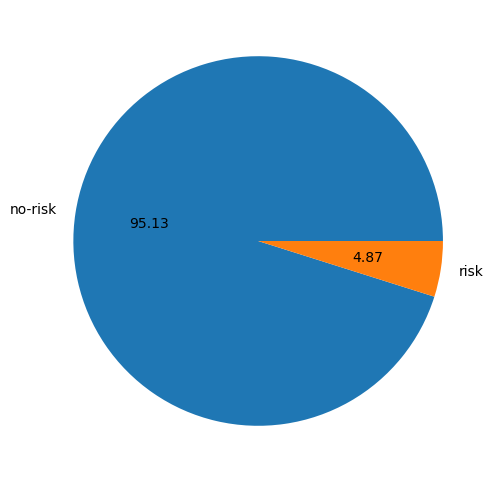

In [399]:

plt.pie(data['stroke'].value_counts(),labels=['no-risk','risk'],autopct="%0.2f")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25300\3884855220.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

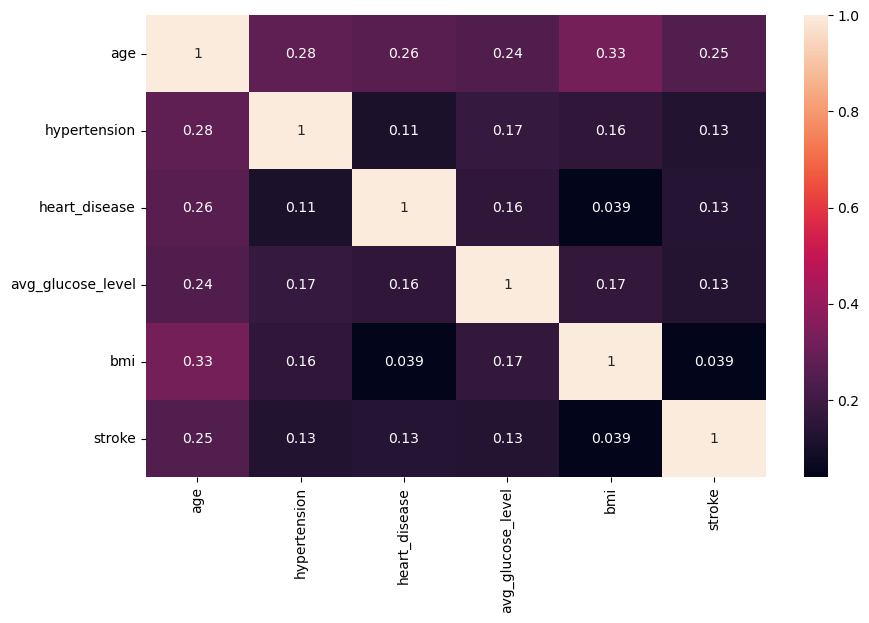

In [400]:
#correlation cofficients b/w parameters
sns.heatmap(data.corr(),annot=True)

<Figure size 800x500 with 0 Axes>

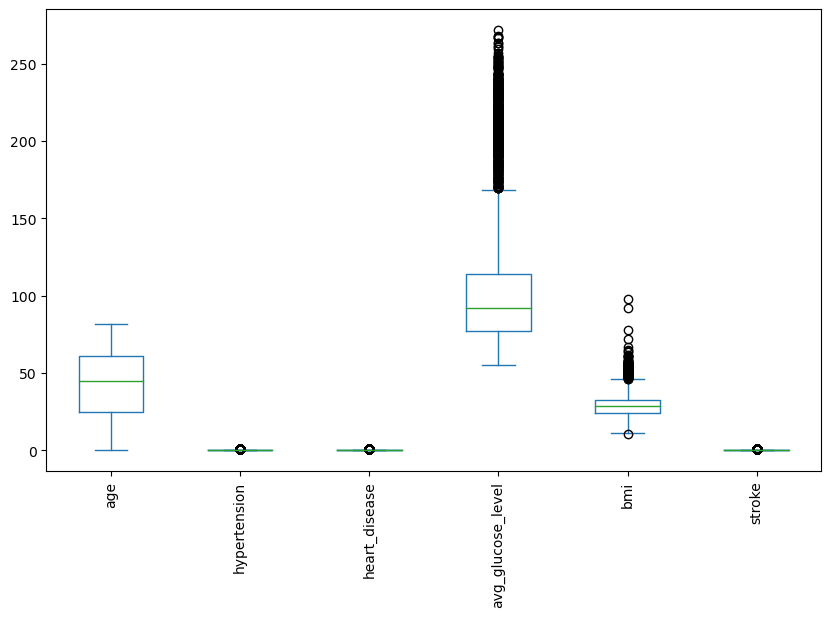

In [401]:
# outlier detection
plt.figure(figsize=(8,5),facecolor='white')
data.plot(kind='box')
plt.xticks(rotation='vertical')
plt.show()

In [402]:
cols= data[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_25300\490727114.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25300\490727114.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
C:\Users\lenovo\AppData\Local\Temp\ipykern

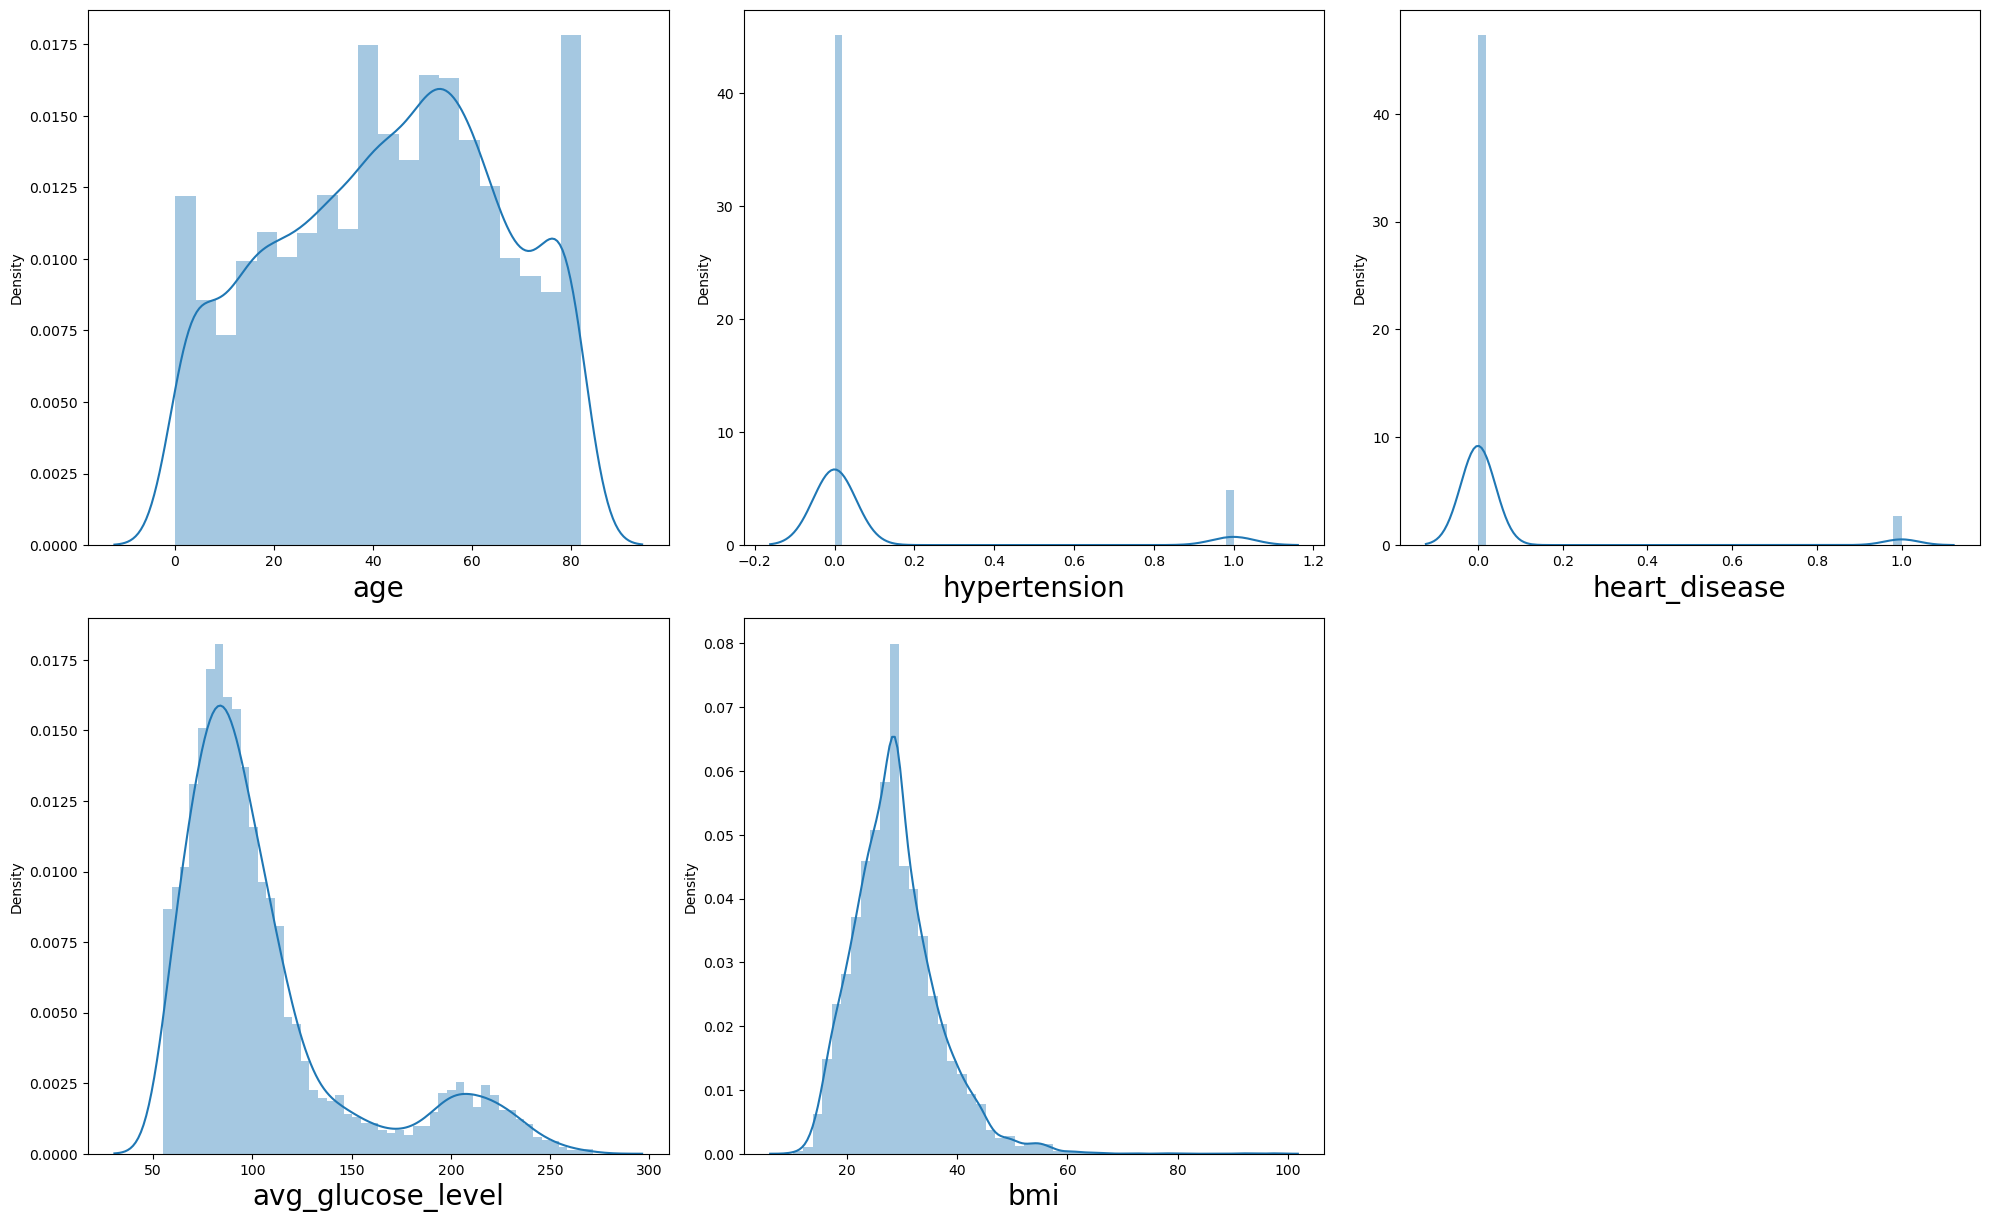

In [403]:
#lets see how data is ditributed for every coloumn
import seaborn as sns
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax =plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [404]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

# Data Preprocessing

In [405]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [406]:
# Label Encoding
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [407]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [408]:
data['gender']=enc.fit_transform(data['gender'])

In [409]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [410]:
data['ever_married']=enc.fit_transform(data['ever_married'])
data['work_type']=enc.fit_transform(data['work_type'])
data['Residence_type']=enc.fit_transform(data['Residence_type'])
data['smoking_status']=enc.fit_transform(data['smoking_status'])

In [411]:
data['work_type'].unique()

array([2, 3, 0, 4, 1])

In [412]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [413]:
#data partitioning = splitting the data for train and test
#x-->x_train,x_test     y-->y_train,y_test (80/20)
x=data.drop('stroke',axis=1)

In [414]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [415]:
y=data['stroke']

In [416]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [417]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101) #random state is 101 for random distribution of training and testing data

In [418]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [419]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [420]:
y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [421]:
y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [422]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [423]:
# Normalisation of input data features(attribute variables are scaled down to fit in a range to improve performance-min/max algo,z scale normalization )
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [424]:
import pickle
import os

In [425]:
#saving the standardised scalar object in a file
scaler_path=os.path.join('C:/Users/lenovo/Machine Learning Projects/stroke prediction/','models/scaler.pkl')
with open(scaler_path,'wb')as scaler_file:
    pickle.dump(std,scaler_file) #writing standardized scaler data into scalar.pkl file by process of serialization(object stream to byte stream)

In [426]:
x_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [427]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [428]:
x_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

# Model building


In [429]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [430]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [431]:
dt.feature_importances_ #determines the importance of every feature in the data

array([0.05265759, 0.16357605, 0.03082529, 0.02239527, 0.00296279,
       0.04069978, 0.05473828, 0.32867101, 0.2404708 , 0.06300316])

In [432]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [433]:
y_pred=dt.predict(x_test_std)

In [434]:
y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [435]:
from sklearn.metrics import accuracy_score

In [436]:
ac_dt=accuracy_score(y_test,y_pred)


In [437]:
print(ac_dt)

0.9099804305283757


In [438]:
import joblib
model_path=os.path.join('C:/Users/lenovo/Machine Learning Projects/stroke prediction/','models/dt.sav')
joblib.dump(dt,model_path)  #the data stored in dt object is getting dumped into dt.sav file by process of serialization using joblib

['C:/Users/lenovo/Machine Learning Projects/stroke prediction/models/dt.sav']

In [439]:
#by using hyperparameter tuning we can improve the accuracy but here we are not doing any hyperparameter tuning
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_std,y_train)
y_pred=lr.predict(x_test_std)
ac_lr=accuracy_score(y_test,y_pred)

print(ac_lr)

0.9471624266144814


In [440]:
#k nearest neighbors(by default it takes 'k' value  5 here)
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train_std,y_train)
y_pred=knn.predict(x_test_std)
ac_knn=accuracy_score(y_test,y_pred)

print(ac_knn)



0.9452054794520548


In [441]:
#random forest=collection of so many randomly sampled decision trees and selecting the majority answer among there results as answer
#random forest and decision tree algo do not require stardized data(x_train_std,x_test_std) as they are not calculating any distance while giving results.
#random forest and decision trees can also use normal data(x_train,x_test) to claculate accuracy.it do not neccessarily need standardized data(x_train_std,x_test_std).
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_std,y_train)
y_pred=rf.predict(x_test_std)
ac_rf=accuracy_score(y_test,y_pred)

print(ac_rf)

0.9452054794520548


In [453]:
#svm
from sklearn.svm import SVC
sv=SVC(kernel='sigmoid',gamma=1.0)
sv.fit(x_train_std,y_train)
y_pred=sv.predict(x_test_std)
ac_sv=accuracy_score(y_test,y_pred)

print(ac_sv)


0.910958904109589


In [443]:
#voting classifier(to use multiple algorithms together(ensembling of diff. algos) to check change in accuracy )
lr=LogisticRegression()
knn= KNeighborsClassifier()
rf=RandomForestClassifier()

from sklearn.ensemble import VotingClassifier

In [444]:
voting=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rf)],voting='soft')

In [445]:
voting.fit(x_train_std,y_train)
y_pred=voting.predict(x_test_std)
ac_voting=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy_score(y_test,y_pred))


Accuracy 0.9471624266144814


In [446]:
voting=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rf)],voting='hard')
voting.fit(x_train_std,y_train)
y_pred=voting.predict(x_test_std)
ac_voting=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9471624266144814


In [447]:
# Applying stacking(a method for ensembling different algos to check change in accuracy)
estimators=[('lr',lr),('knn',knn),('rfc',rf)]
final_estimator=LogisticRegression()


In [448]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [449]:
clf.fit(x_train_std,y_train)
y_pred=clf.predict(x_test_std)
ac_stacking=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9471624266144814


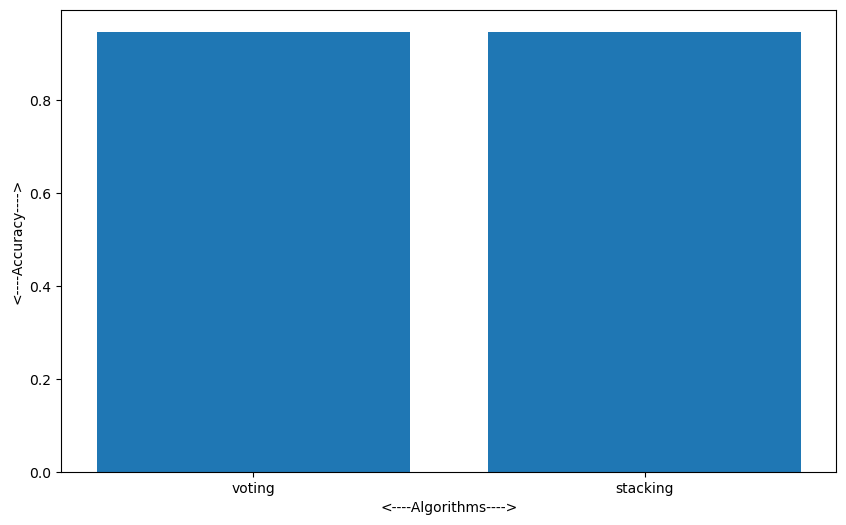

In [450]:
plt.bar(['voting','stacking'],[ac_voting,ac_stacking])
plt.xlabel("<----Algorithms---->")
plt.ylabel("<----Accuracy---->")
plt.show()

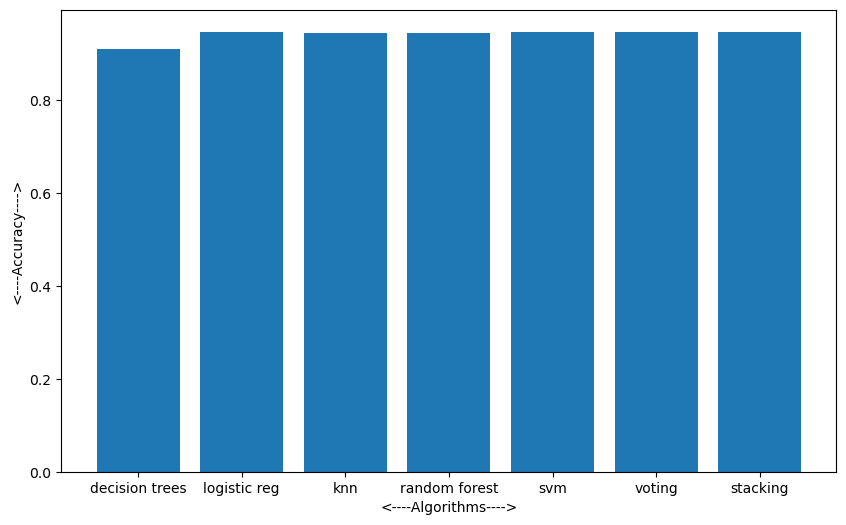

In [451]:
plt.bar(['decision trees','logistic reg','knn','random forest','svm','voting','stacking'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv,ac_voting,ac_stacking])
plt.xlabel("<----Algorithms---->")
plt.ylabel("<----Accuracy---->")
plt.show()

In [452]:
model_path1=os.path.join('C:/Users/lenovo/Machine Learning Projects/stroke prediction/','models/clf.sav')
joblib.dump(clf,model_path1)

['C:/Users/lenovo/Machine Learning Projects/stroke prediction/models/clf.sav']